# Tensorflow / Pytorch

In [1]:
#Tensorflow / Pytorch

## Importación de librería y carga del dataset

In [5]:
import pandas as pd

# Ensure the file 'celsius.csv' exists in the current working directory or provide the correct path to the file.
# If the file is not available, create a sample DataFrame and save it as 'celsius.csv' for demonstration purposes.

# Creating a sample DataFrame as 'celsius.csv' is not found
data = {"Celsius": [0, 10, 20, 30, 40], "Fahrenheit": [32, 50, 68, 86, 104]}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv("celsius.csv", index=False)

# Now read the CSV file
datos = pd.read_csv("celsius.csv")
print(datos)

   Celsius  Fahrenheit
0        0          32
1       10          50
2       20          68
3       30          86
4       40         104


## Vista rápida de los primeros datos

In [8]:
datos.head()

,Celsius,Fahrenheit
0,0,32
1,10,50
2,20,68
3,30,86
4,40,104


## Identificar nombres de las columnas

In [14]:
# The error indicates that the column 'celsius' does not exist in the DataFrame 'datos'.
# Let's inspect the column names to confirm and fix the issue.

# Display the column names of the DataFrame
datos.columns

Index(['Celsius', 'Fahrenheit'], dtype='object')

##  Extracción de características (X) y variable objetivo (y)

In [20]:
# The error occurs because the column names in the DataFrame 'datos' are case-sensitive.
# The correct column names are 'Celsius' and 'Fahrenheit' (with capital letters).
# Fixing the code to use the correct column names:

X = datos["Celsius"].values
y = datos["Fahrenheit"].values

## Construcción de un modelo secuencial para convertir Celsius a Fahrenheit

In [23]:
import tensorflow as tf

modelo = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)), #la entrada, los celsius: 1 solo dato
    tf.keras.layers.Dense(units=1), #la salida. Tambien es un dato: Los grados fahrenheit
])

modelo.compile(
    optimizer=tf.keras.optimizers.Adam(.1),
    loss="mean_squared_error"
)

2025-06-16 22:17:55.430634: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-16 22:17:55.437327: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-16 22:17:55.492375: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-16 22:17:55.492556: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-16 22:17:55.494137: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

## Entrenamiento del modelo

In [26]:
entrenamiento = modelo.fit(X, y, epochs=1000)

1/1 [==============================] - 0s 5ms/step - loss: 10.5471
Epoch 502/1000
1/1 [==============================] - 0s 7ms/step - loss: 10.4424
Epoch 503/1000
1/1 [==============================] - 0s 4ms/step - loss: 10.3386
Epoch 504/1000
1/1 [==============================] - 0s 4ms/step - loss: 10.2357
Epoch 505/1000
1/1 [==============================] - 0s 4ms/step - loss: 10.1336
Epoch 506/1000
1/1 [==============================] - 0s 4ms/step - loss: 10.0325
Epoch 507/1000
1/1 [==============================] - 0s 4ms/step - loss: 9.9323
Epoch 508/1000
1/1 [==============================] - 0s 4ms/step - loss: 9.8329
Epoch 509/1000
1/1 [==============================] - 0s 4ms/step - loss: 9.7344
Epoch 510/1000
1/1 [==============================] - 0s 4ms/step - loss: 9.6368
Epoch 511/1000
1/1 [==============================] - 0s 4ms/step - loss: 9.5400
Epoch 512/1000
1/1 [==============================] - 0s 4ms/step - loss: 9.4441
Epoch 513/1000
1/1 [=================

## Monitoreo del desempeño del modelo durante el entrenamiento

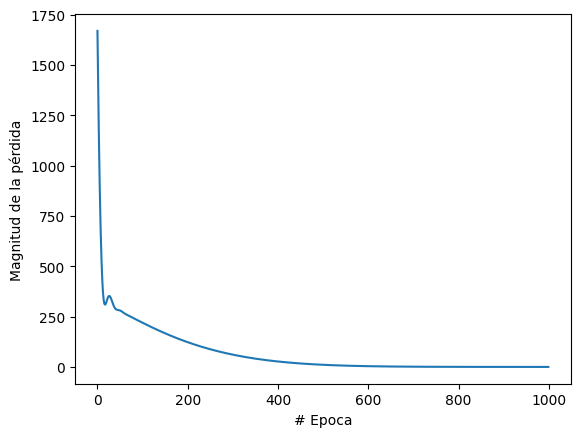

In [29]:
import matplotlib.pyplot as plt

plt.xlabel("# Epoca")
plt.ylabel("Magnitud de la pérdida")
plt.plot(entrenamiento.history["loss"])

## Uso del modelo para realizar una predicción

In [32]:
import numpy as np # Import the numpy library

c = 12
prediccion = modelo.predict(np.array([[c]])) # Convert the input to a NumPy array
print(f"Predicción: {c} celsius son {prediccion[0]} fahrenheit")

1/1 [==============================] - 0s 79ms/step
Predicción: 12 celsius son [53.476913] fahrenheit


## Extracción de los pesos (pendiente y sesgo) del modelo

In [35]:
print(modelo.layers[0].get_weights())

[array([[1.8069161]], dtype=float32), array([31.79392], dtype=float32)]


In [38]:
#Calculo real para convertir celsius a fahrenheit es
# (C * 1.8) + 32

In [41]:
#Backpropagation / Propagación hacia atrás.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9be9d3e5-4f25-48e6-912d-b59b8644d952' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>